In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
def make_data(n=50):
    rng = np.random.RandomState(0)
    X = rng.rand(n, 1) * 10
    err = rng.normal(size=n) * 0.3
    y = np.sin(X).ravel() + err
    return X, y

In [3]:
def plot_data(X, y):
    plt.scatter(X, y, color='k')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

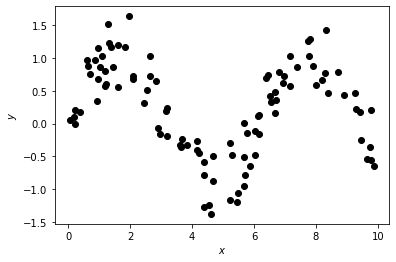

In [15]:
X, y = make_data(50)
plot_data(X, y)
plt.savefig('sin_data.pdf')

In [16]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

def PolynomialRegression(degree=10, alpha=1):
    return Pipeline([('scaler', StandardScaler()),
                     ('polyfeatures', PolynomialFeatures(degree)),
                     ('ridge', Ridge(alpha))])

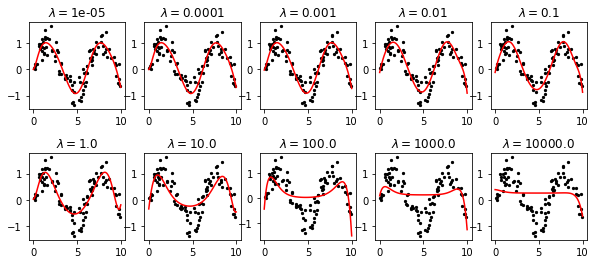

In [17]:
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
plt.subplots_adjust(hspace=0.5)
alpha = 0.00001

for ax in axes.flat:
    reg = RidgePolynomialRegression(alpha=alpha)
    reg.fit(X, y)
    y_test = reg.predict(X_test)
    ax.plot(X_test, y_test, color='r')
    ax.set_title(f'$\lambda = ${alpha}')
    ax.scatter(X, y, color='k', s=5)
    alpha *= 10

plt.savefig('ridge.pdf')

In [18]:
alpha = 0.00001
for i in range(10):
    reg = RidgePolynomialRegression(degree=10, alpha=alpha)
    reg.fit(X, y)
    coef = reg.named_steps['ridge'].coef_[1:]
    print(coef)
    alpha *= 10

[-0.34255958  4.65041874  1.52936947 -4.40599301 -1.90098186  2.23311211
  0.88066028 -0.67051191 -0.1365452   0.08475464]
[-0.33965761  4.63580242  1.51570516 -4.36588145 -1.88217563  2.19393547
  0.87079965 -0.65469155 -0.13481568  0.08249219]
[-0.31363162  4.50439571  1.39332345 -4.00624119 -1.71391192  1.84322694
  0.78264629 -0.51321344 -0.11936373  0.06227446]
[-0.19071657  3.87021122  0.82356155 -2.31939344 -0.9393007   0.22556941
  0.38056787  0.13218128 -0.04939819 -0.02922885]
[-0.04619268  3.00037721  0.25566347 -0.6695211  -0.28744623 -0.98332127
  0.09608197  0.51757036 -0.00745002 -0.07428806]
[ 0.04317733  1.66557129 -0.03687544  0.17571591 -0.11153223 -0.41803515
  0.12726457 -0.02719409 -0.03157695  0.03059514]
[ 0.0125075   0.60775006  0.01115537  0.34194187 -0.01115688  0.0516252
 -0.02478579 -0.1976274   0.01210612  0.03770911]
[-0.00213858  0.13360357 -0.00969971  0.11558718 -0.02610679  0.0725844
 -0.03817568  0.00108649  0.0228815  -0.01947446]
[-0.00410878  0.02

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'polyfeatures__degree': np.arange(1, 11),
    'ridge__alpha': np.logspace(-5, 4, num=10)
}

grid = GridSearchCV(RidgePolynomialRegression(), param_grid, n_jobs=-1)
grid.fit(X, y)

print(grid.best_params_)

{'polyfeatures__degree': 8, 'ridge__alpha': 0.01}
